

# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [20]:
import pandas as pd
import numpy as np 

def err(t):
    if t < 15:
        return 1
    if t < 30:
        return 2
    if t < 60:
        return 3
    return 4


file = pd.read_csv('data.csv')

file.describe()
#1
file.loc[file['age'] > 100, 'age'] = 2006 - file['age']
#2
file = file.rename(columns={"plans_universitypast_failures": "plans_university"})
file.insert(17, "past_failures", file['plans_university'])
file.loc[file['plans_university']>=-100, 'plans_university'] = abs(file['plans_university'])//file['plans_university']
file.loc[file['past_failures']>=-100, 'past_failures'] = abs(file['past_failures']%10)%5
#3
file['traveltime'] = np.array([(i if i <= 4 else err(i)) for i in file['traveltime']])
file.describe()
#4 в столбцах  Dalc Walc goout не всегда есть значения


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.315871
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.878627
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [21]:
file['goout']=file['goout'].fillna(file['goout'].mean())
file['Dalc']=file['Dalc'].fillna(file['Dalc'].mean())
file['Walc']=file['Walc'].fillna(file['Walc'].mean())

file.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.315871
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.878627
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [22]:
#min-max
for i in file.columns:
    file[i]=(file[i]-file[i].min())/(file[i].max()-file[i].min())
file.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.078968
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.219657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#mean
for i in file.columns:
    file[i]=(file[i]-file[i].mean())/file[i].std()
file.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_support,attendance
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,649.000000,6.490000e+02,6.490000e+02,649.000000,6.490000e+02,6.490000e+02
mean,4.543532e-16,-1.026400e-16,-7.390082e-17,-4.379308e-17,-7.390082e-17,-1.464331e-16,2.244395e-16,1.601185e-16,-6.842669e-17,-8.758616e-17,-1.327478e-16,1.094827e-17,8.758616e-17,-1.053771e-16,0.000000,-6.500535e-17,-1.696982e-16,0.000000,6.842669e-18,-7.663789e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.431876e+00,-2.216415e+00,-2.097064e+00,-7.594462e-01,-1.121943e+00,-3.066455e+00,-2.074296e+00,-1.861294e+00,-5.422734e-01,-1.004971e+00,-1.753634e+00,-8.327346e-01,-1.513566e+00,-6.476758e-01,-2.664872,-2.015947e+00,-2.897041e+00,-0.359505,-3.418468e-01,-6.106873e+00
25%,-6.109506e-01,-4.536045e-01,-1.187916e+00,-7.594462e-01,-1.121943e+00,7.255019e-02,-1.715142e-01,-1.010117e+00,-5.422734e-01,-1.004971e+00,-1.062195e+00,-8.327346e-01,-1.513566e+00,-6.476758e-01,0.374674,4.952806e-01,3.446480e-01,-0.359505,-3.418468e-01,-5.043408e-01
50%,2.099747e-01,-4.536045e-01,-2.787680e-01,-7.594462e-01,8.358848e-02,7.255019e-02,-1.715142e-01,-1.589390e-01,-5.422734e-01,-2.235969e-01,3.206828e-01,-8.327346e-01,6.596735e-01,-6.476758e-01,0.374674,4.952806e-01,3.446480e-01,-0.359505,-3.418468e-01,3.575872e-01
75%,1.030900e+00,1.309206e+00,6.303800e-01,5.762735e-01,8.358848e-02,1.118885e+00,7.798767e-01,6.922386e-01,5.473892e-01,5.577769e-01,1.012122e+00,1.199013e+00,6.596735e-01,1.541603e+00,0.374674,4.952806e-01,3.446480e-01,-0.359505,-3.418468e-01,7.885512e-01
max,4.314601e+00,1.309206e+00,1.539528e+00,3.247713e+00,2.494652e+00,1.118885e+00,1.731268e+00,1.543416e+00,3.816377e+00,2.120525e+00,1.012122e+00,1.199013e+00,6.596735e-01,1.541603e+00,0.374674,4.952806e-01,3.446480e-01,4.193053,2.920779e+00,7.885512e-01


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

answers = pd.read_csv('scores.csv')
reg = LinearRegression()
res = cross_validate(reg, file.values[1:], answers.values, cv = 4)
print(res['test_score'])

[0.24034552 0.25214943 0.15359392 0.12820618]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [29]:

a = np.zeros(649)
with open ('school_support.txt') as support:
    for i in support.readlines():
        a[int(i)-1]=1
attend = pd.read_csv('attendance.csv')
#file.insert(18, "school_support", a

file['school_support']=a

b = np.zeros(649)
file['attendance'] = np.array([i.count('+') for i in pd.read_csv('attendance.csv').values.reshape((649,))])
file.describe()
file.to_csv("data_fixed.csv", index=False)

### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_support,attendance
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,649.000000,6.490000e+02,6.490000e+02,649.000000,649.000000,649.000000
mean,4.543532e-16,-1.026400e-16,-7.390082e-17,-4.379308e-17,-7.390082e-17,-1.464331e-16,2.244395e-16,1.601185e-16,-6.842669e-17,-8.758616e-17,-1.327478e-16,1.094827e-17,8.758616e-17,-1.053771e-16,0.000000,-6.500535e-17,-1.696982e-16,0.000000,0.104777,28.340524
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,0.306502,4.640759
min,-1.431876e+00,-2.216415e+00,-2.097064e+00,-7.594462e-01,-1.121943e+00,-3.066455e+00,-2.074296e+00,-1.861294e+00,-5.422734e-01,-1.004971e+00,-1.753634e+00,-8.327346e-01,-1.513566e+00,-6.476758e-01,-2.664872,-2.015947e+00,-2.897041e+00,-0.359505,0.000000,0.000000
25%,-6.109506e-01,-4.536045e-01,-1.187916e+00,-7.594462e-01,-1.121943e+00,7.255019e-02,-1.715142e-01,-1.010117e+00,-5.422734e-01,-1.004971e+00,-1.062195e+00,-8.327346e-01,-1.513566e+00,-6.476758e-01,0.374674,4.952806e-01,3.446480e-01,-0.359505,0.000000,26.000000
50%,2.099747e-01,-4.536045e-01,-2.787680e-01,-7.594462e-01,8.358848e-02,7.255019e-02,-1.715142e-01,-1.589390e-01,-5.422734e-01,-2.235969e-01,3.206828e-01,-8.327346e-01,6.596735e-01,-6.476758e-01,0.374674,4.952806e-01,3.446480e-01,-0.359505,0.000000,30.000000
75%,1.030900e+00,1.309206e+00,6.303800e-01,5.762735e-01,8.358848e-02,1.118885e+00,7.798767e-01,6.922386e-01,5.473892e-01,5.577769e-01,1.012122e+00,1.199013e+00,6.596735e-01,1.541603e+00,0.374674,4.952806e-01,3.446480e-01,-0.359505,0.000000,32.000000
max,4.314601e+00,1.309206e+00,1.539528e+00,3.247713e+00,2.494652e+00,1.118885e+00,1.731268e+00,1.543416e+00,3.816377e+00,2.120525e+00,1.012122e+00,1.199013e+00,6.596735e-01,1.541603e+00,0.374674,4.952806e-01,3.446480e-01,4.193053,1.000000,32.000000


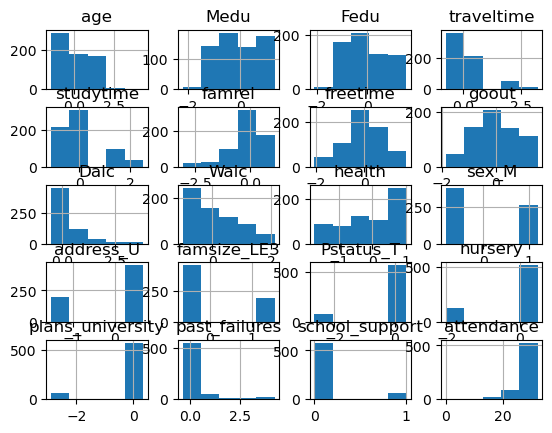

In [30]:
file.hist(bins=5)
file.describe()

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

Mean squared error: 217.02


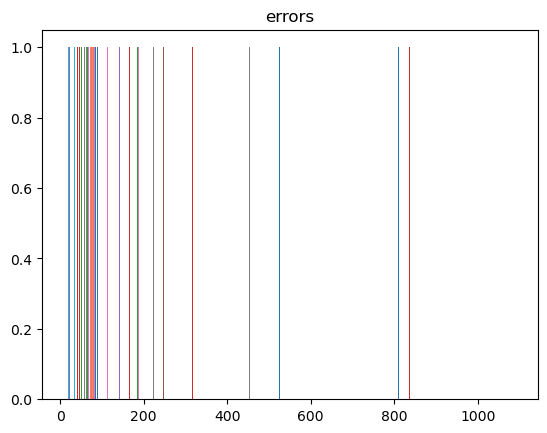

In [26]:
#min-max нормализация
import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(file.values[1:], answers.values)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 215.38


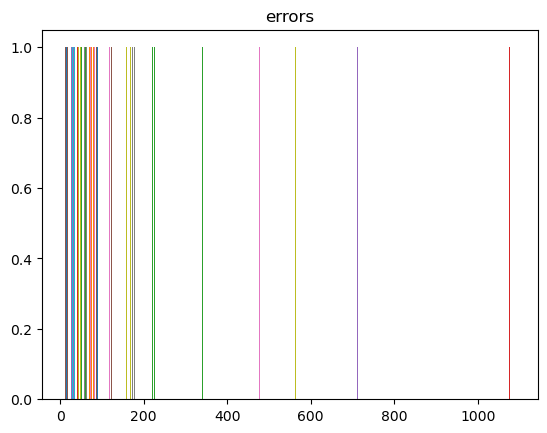

In [31]:
#mean нормализация
import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(file.values[1:], answers.values)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
Сделал несколько запусков с разной нормализацией данных с min-max и mean. Видно что разные нормализации 
 почти никак не повлияли на срнеднеквадратичную ошибку. Можно было заменить значение NaN не на медиану, 
возможно это дало бы лучший результат. А также возможно замена колличества 
посещений на 1\0 (посещал\не посещал) обучила бы модель лучше
Спасибо Ивану Осокину за помощь с заданием!
Делали вместе с Алексеем Волковым